Purpose: Explore the effect that averaging bulk data has on EGAD

In [1]:

import pandas as pd
import anndata
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Should the samples be quantile normalized? How similar does each sample look like

In [2]:
# GTEX
adata = anndata.read_h5ad('/pipeline42/datasets/Gtex/GTEx_K1')

In [3]:
labels = adata.obs.loc[:,"SMTS"]

Text(0.5, 0.98, 'Correlations Bulk, K=1')

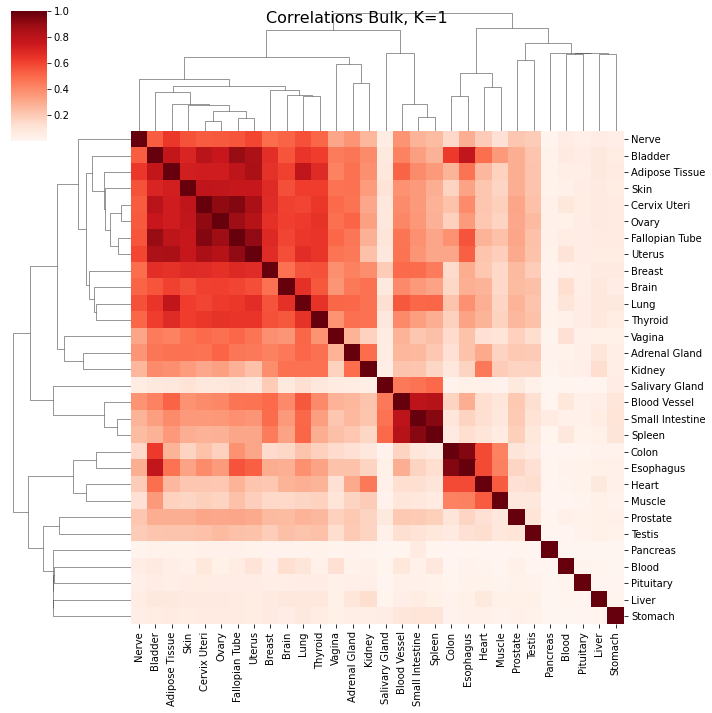

In [4]:
ax = sns.clustermap(np.corrcoef(adata.X), xticklabels=labels, yticklabels=labels, annot=False, cmap="Reds", )
ax.fig.suptitle("Correlations Bulk, K=1", fontsize=16)

In [5]:
adata20 = anndata.read_h5ad('/pipeline42/datasets/Gtex/GTEx_K20')

In [6]:
# create a palette with a unique color for each SMTS value
palette = sns.hls_palette(len(set(adata20.obs['SMTS'])), )

# create a dictionary mapping each SMTS value to a color from the palette
mapping = dict(zip(adata20.obs.loc[:,'SMTS'].unique(), palette))


adata20.obs = adata20.obs.set_index('SAMPID')

annotser = adata20.obs.loc[:,'SMTS']

# Map colors
colors = [mapping.get(annotser[i]) for i in range(len(annotser))]

# add to annot df
annotdf = pd.DataFrame({'samples':annotser, 'colors':colors})
annotdf = annotdf.drop('samples', axis = 1)



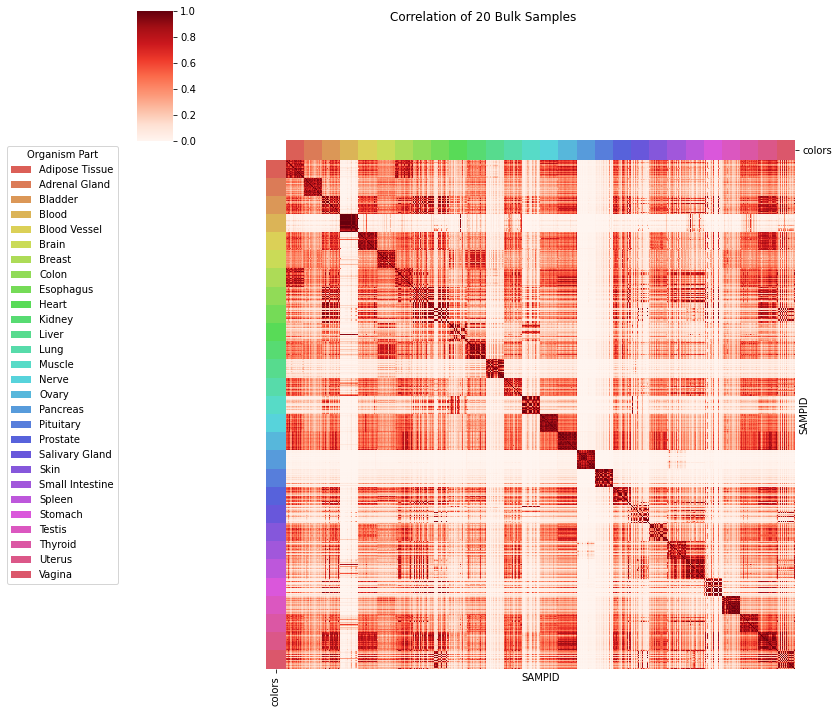

In [14]:
from matplotlib.patches import Patch

labels = adata20.obs.loc[:,'SMTS'].unique()

adatacor = adata20.to_df().transpose().corr()


g = sns.clustermap(adatacor, annot=False, cmap="Reds"
                    ,row_cluster=False, 
                    col_cluster=False,
                    row_colors=annotdf,
                    xticklabels=False,
                    yticklabels=False,
                    col_colors=annotdf
                  )

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle('Correlation of 20 Bulk Samples')

handles = [Patch(facecolor=mapping[key]) for key in mapping]
plt.legend(handles, mapping, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

/home/aadrian/anaconda3/envs/PseudoPipelineEnv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


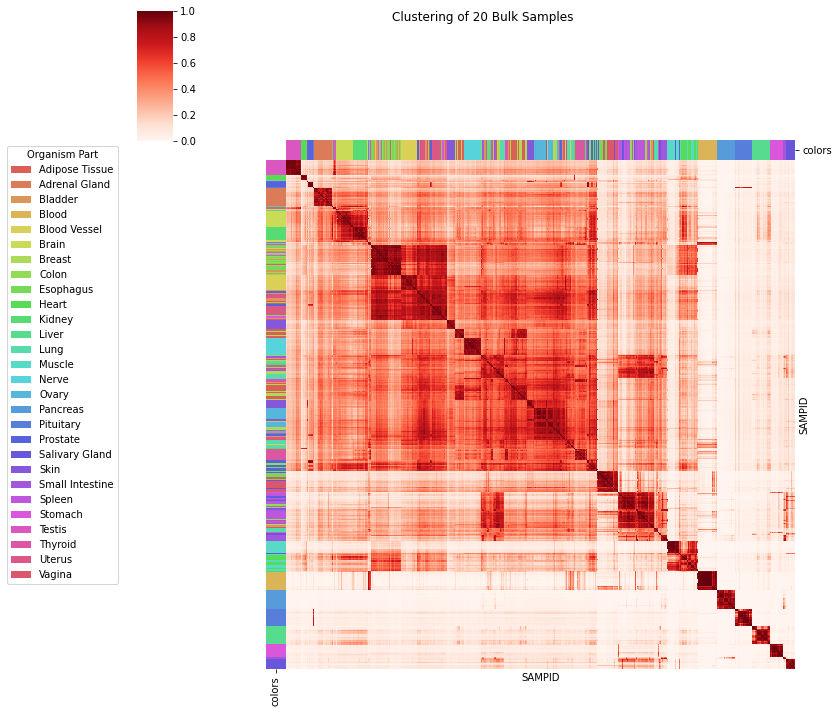

In [8]:
from matplotlib.patches import Patch

labels = adata20.obs.loc[:,'SMTS'].unique()

adatacor = adata20.to_df().transpose().corr()


g = sns.clustermap(adatacor, annot=False, cmap="Reds"
                    ,row_cluster=True, 
                    col_cluster=True,
                    row_colors=annotdf,
                    xticklabels=False,
                    yticklabels=False,
                    col_colors=annotdf
                  )

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle('Clustering of 20 Bulk Samples')

handles = [Patch(facecolor=mapping[key]) for key in mapping]
plt.legend(handles, mapping, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

Now Average each group

In [9]:
def calc_mean(adata, OP):
    "Calculates the mean of an Organism Part"
    return np.mean(adata[adata.obs.SMTS == OP].X, axis = 0)



In [10]:

def aggr_bulk(adata, organism_parts):
    
    means = []
    
    for organism_part in organism_parts:
        means.append(calc_mean(adata, organism_part))
        
    return pd.DataFrame(means, index=organism_parts, columns=adata.to_df().columns)
        

In [11]:
aggr_bulk = aggr_bulk(adata, labels)

Text(0.5, 0.98, 'Correlations after Aggragation')

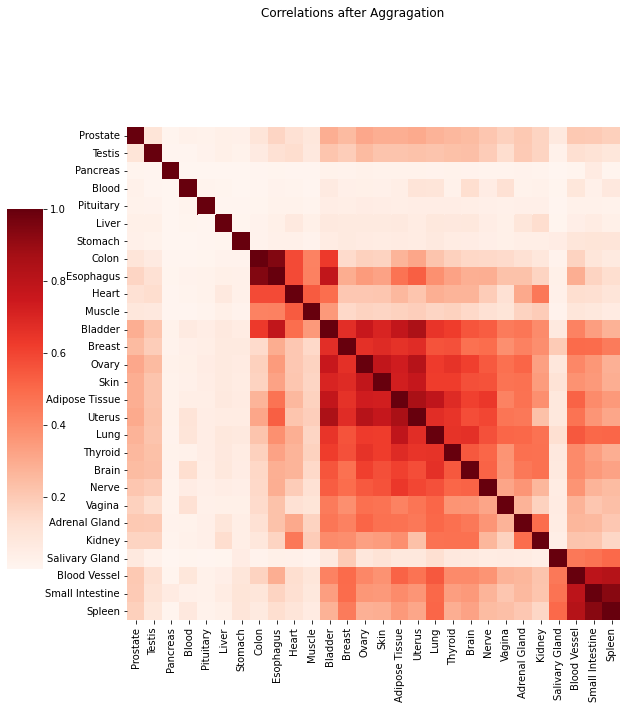

In [12]:
import seaborn as sns
import numpy as np

corr = aggr_bulk.transpose().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.clustermap(corr, annot=False, cmap="Reds",
                   row_cluster=True, col_cluster=True,
                   xticklabels=True, yticklabels=True,
                   cbar_pos=(0.02, 0.2, 0.05, 0.5),
                   
                   )
g.ax_heatmap.yaxis.tick_left()  # move y-axis ticks to the left
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)


g.fig.suptitle('Correlations after Aggragation')

## What if we quantile normalize the samples first

In [13]:
from matplotlib.patches import Patch


adatacor = adata20df_normalized.transpose().corr()


g = sns.clustermap(adatacor, annot=False, cmap="Reds"
                    ,row_cluster=False, 
                    col_cluster=False,
                    row_colors=annotdf,
                    xticklabels=False,
                    yticklabels=False,
                    col_colors=annotdf
                  )

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle('Correlation of 20 Bulk Samples Post Quantile Normalization')

handles = [Patch(facecolor=mapping[key]) for key in mapping]
plt.legend(handles, mapping, title='Organism Part',
           bbox_to_anchor=(0, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

NameError: name 'adata20df_normalized' is not defined